In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

In [3]:
df = pd.read_csv('winequality.csv')

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [7]:
df.describe(include = 'all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
df.columns.tolist()

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
for col in df.columns:
    print(df[col].unique())

['white' 'red']
[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3    nan  7.4   6.5
  6.4   6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5
  9.8   5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3
  5.4   9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3
  9.4   9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15
  4.5   7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9  11.2  10.1  11.5
 12.8  11.   11.6  12.   15.   10.8  11.1  12.5  10.9  11.4  10.4  13.3
 10.6  13.4  11.9  12.4  12.2  13.8  13.5  10.5  12.6  14.   13.7  12.7
 12.3  15.6  11.3  13.   12.9  14.3  15.5  11.7  13.2  15.9  12.1 ]
[0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44    nan 0.265 0.36
 0.305 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57
 0.4   0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.

In [12]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
    

In [13]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df['fixed acidity'].dtype

dtype('float64')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

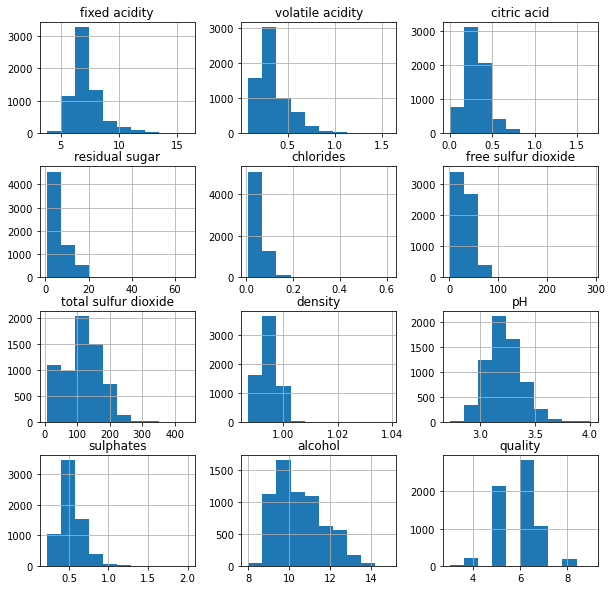

In [15]:
df.hist(bins = 10,figsize=(10,10))

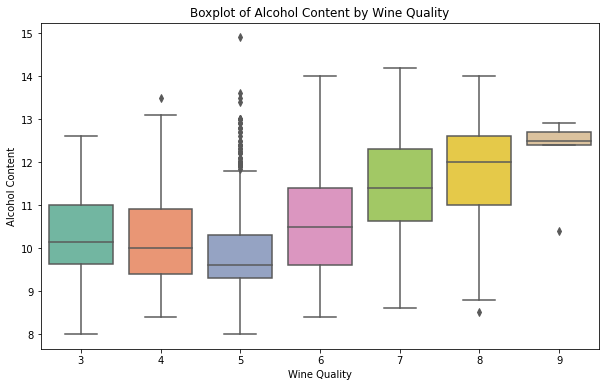

In [15]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')

# Add labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Content")
plt.title("Boxplot of Alcohol Content by Wine Quality")

# Show plot
plt.show()

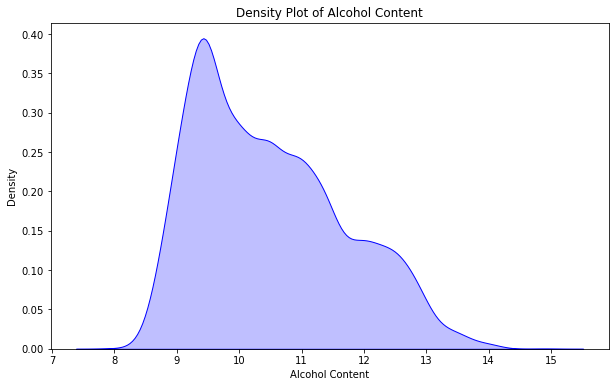

In [16]:
# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['alcohol'], fill=True, color='blue')

# Add labels and title
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.title("Density Plot of Alcohol Content")

# Show plot
plt.show()

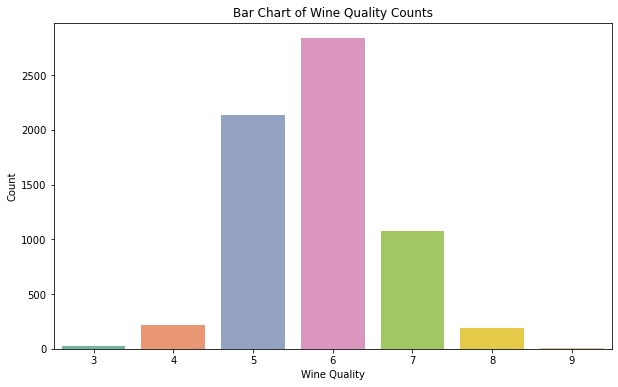

In [17]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='Set2')

# Add labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Bar Chart of Wine Quality Counts")

# Show plot
plt.show()

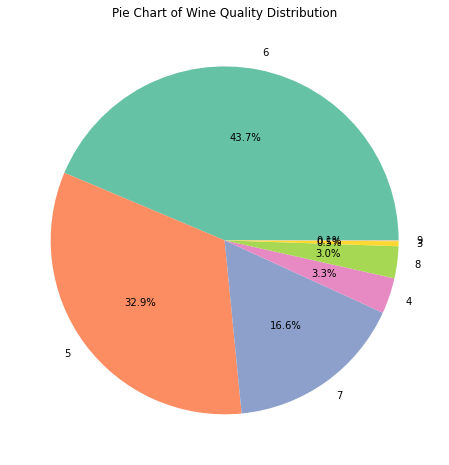

In [18]:
# Create a pie chart
plt.figure(figsize=(8, 8))
wine_quality_counts = df['quality'].value_counts()
plt.pie(wine_quality_counts, labels=wine_quality_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))

# Add title
plt.title("Pie Chart of Wine Quality Distribution")

# Show plot
plt.show()


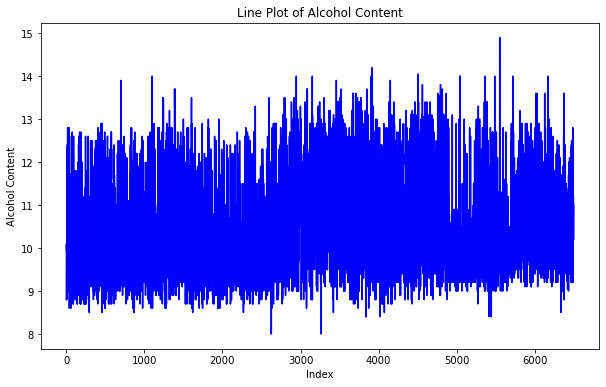

In [19]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['alcohol'], color='blue')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Alcohol Content")
plt.title("Line Plot of Alcohol Content")

# Show plot
plt.show()


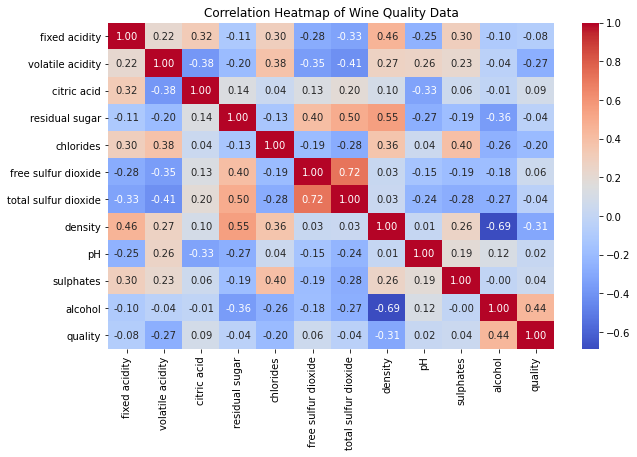

Correlation between Alcohol and Quality: 0.44


In [20]:
### 1. Correlation (Pearson) - Numerical vs. Numerical ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Quality Data")
plt.show()

# Example: Correlation between 'alcohol' and 'quality'
correlation = df["alcohol"].corr(df["quality"])
print(f"Correlation between Alcohol and Quality: {correlation:.2f}")

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          1.50e-312
Time:                        11:03:24   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4053      0.086     27.988      0.0

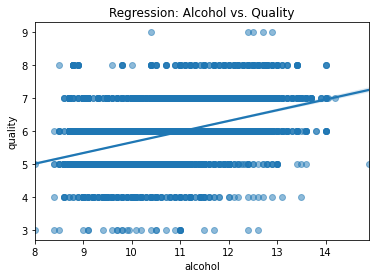

In [21]:
### 2. Regression (Numerical vs. Numerical) ###
import statsmodels.api as sm

X = df["alcohol"]  # Independent variable
y = df["quality"]  # Dependent variable

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

sns.regplot(x="alcohol", y="quality", data=df, scatter_kws={"alpha":0.5})
plt.title("Regression: Alcohol vs. Quality")
plt.show()

In [22]:
### 3. Chi-Square Test (Categorical vs. Categorical) ###
# Convert quality into categorical (Low: 0-5, High: 6-10)
df["quality_category"] = df["quality"].apply(lambda x: "Low" if x <= 5 else "High")

contingency_table = pd.crosstab(df["quality_category"], df["volatile acidity"] > df["volatile acidity"].median())
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p:.5f}")

Chi-Square Test p-value: 0.00000


In [23]:
### 4. t-test (Numerical vs. Categorical) ###
# Comparing 'alcohol' between low and high quality wines
low_quality = df[df["quality_category"] == "Low"]["alcohol"]
high_quality = df[df["quality_category"] == "High"]["alcohol"]

t_stat, p_val = ttest_ind(low_quality, high_quality)
print(f"t-test between Alcohol & Quality: t={t_stat:.3f}, p={p_val:.5f}")

t-test between Alcohol & Quality: t=-34.618, p=0.00000


In [24]:
### 5. ANOVA (Numerical vs. Categorical) ###
anova_result = f_oneway(df[df["quality"] == 3]["alcohol"], 
                        df[df["quality"] == 4]["alcohol"], 
                        df[df["quality"] == 5]["alcohol"], 
                        df[df["quality"] == 6]["alcohol"], 
                        df[df["quality"] == 7]["alcohol"], 
                        df[df["quality"] == 8]["alcohol"])
print(f"ANOVA Test for Alcohol & Quality: F={anova_result.statistic:.3f}, p={anova_result.pvalue:.5f}")


ANOVA Test for Alcohol & Quality: F=382.100, p=0.00000


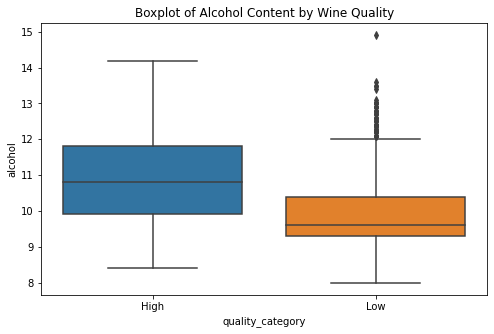

In [25]:
### 6. Boxplot (Numerical vs. Categorical) ###
plt.figure(figsize=(8, 5))
sns.boxplot(x="quality_category", y="alcohol", data=df)
plt.title("Boxplot of Alcohol Content by Wine Quality")
plt.show()